In [21]:
import pandas as pd
import numpy as np

In [22]:
df=pd.read_excel('HR_comma_sep.xlsx')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,sales,low,4649
1,0.80,0.86,5,262,6,0,1,0,sales,medium,34126
2,0.11,0.88,7,272,4,0,1,0,sales,medium,40522
3,0.72,0.87,5,223,5,0,1,0,sales,low,6916
4,0.37,0.52,2,159,3,0,1,0,sales,low,10928
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,5089
14995,0.37,0.48,2,160,3,0,1,0,support,low,4001
14996,0.37,0.53,2,143,3,0,1,0,support,low,12842
14997,0.11,0.96,6,280,4,0,1,0,support,low,8849


TASK 1

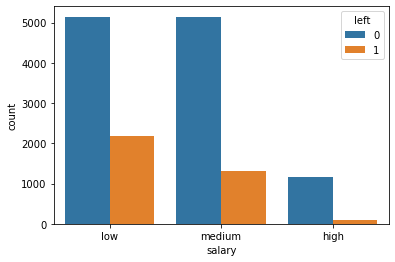

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='salary',hue='left',data=df)
plt.show()

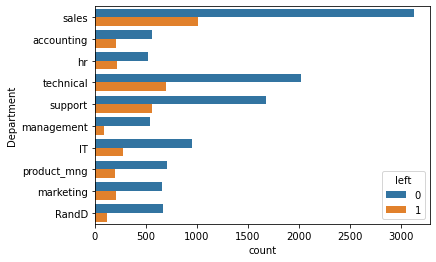

In [24]:
sns.countplot(y='Department',hue='left',data=df)
plt.show()

TASK 2

In [25]:
df[df.isnull().any(axis=1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num


In [26]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
salary_num               0
dtype: int64

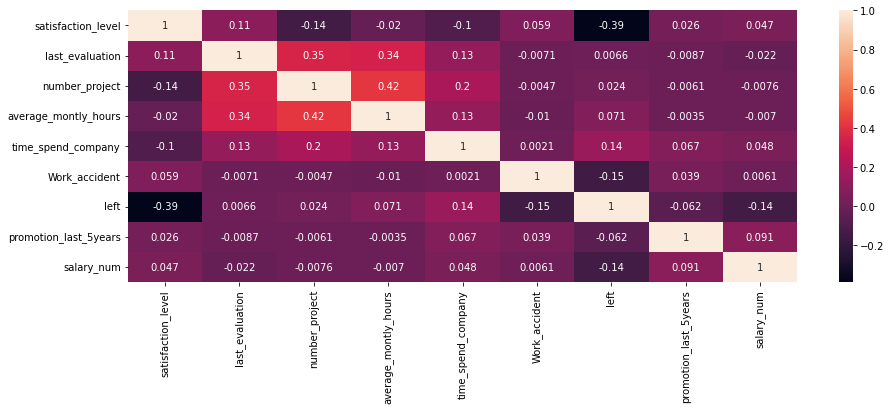

In [27]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [28]:
from sklearn import preprocessing 
encoder= preprocessing.LabelEncoder()
encoder.fit(df.salary)
df.salary=encoder.transform(df.salary)
encoder.fit(df.Department)
df.Department=encoder.transform(df.Department)

In [29]:
correlation=df.corr().loc[:,'left']
correlation1=np.sqrt(correlation**2)

In [30]:
ind=[]
for c in correlation1.index:
    if c !='left':
        if (correlation1[c] < np.quantile(correlation1,[0.1])):
            ind.append(c)
    else:
        continue

In [31]:
correlation[ind]

salary   -0.001294
Name: left, dtype: float64

In [32]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,salary_num
0,0.38,0.53,2,157,3,0,1,0,7,1,4649
1,0.80,0.86,5,262,6,0,1,0,7,2,34126
2,0.11,0.88,7,272,4,0,1,0,7,2,40522
3,0.72,0.87,5,223,5,0,1,0,7,1,6916
4,0.37,0.52,2,159,3,0,1,0,7,1,10928
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1,5089
14995,0.37,0.48,2,160,3,0,1,0,8,1,4001
14996,0.37,0.53,2,143,3,0,1,0,8,1,12842
14997,0.11,0.96,6,280,4,0,1,0,8,1,8849


TASK 3

In [34]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3,random_state=2)
X_train=df_train.drop(columns='left',axis=1)
Y_train=df_train['left']
X_test=df_test.drop(columns='left',axis=1)
Y_test=df_test['left']

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=3).fit(X_train,Y_train)
y_pred=clf.predict(X_train)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_train)

0.9519001809696161

In [37]:
ytest_pred=clf.predict(X_test)
ytest_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
accuracy_score(ytest_pred,Y_test)

0.9542222222222222

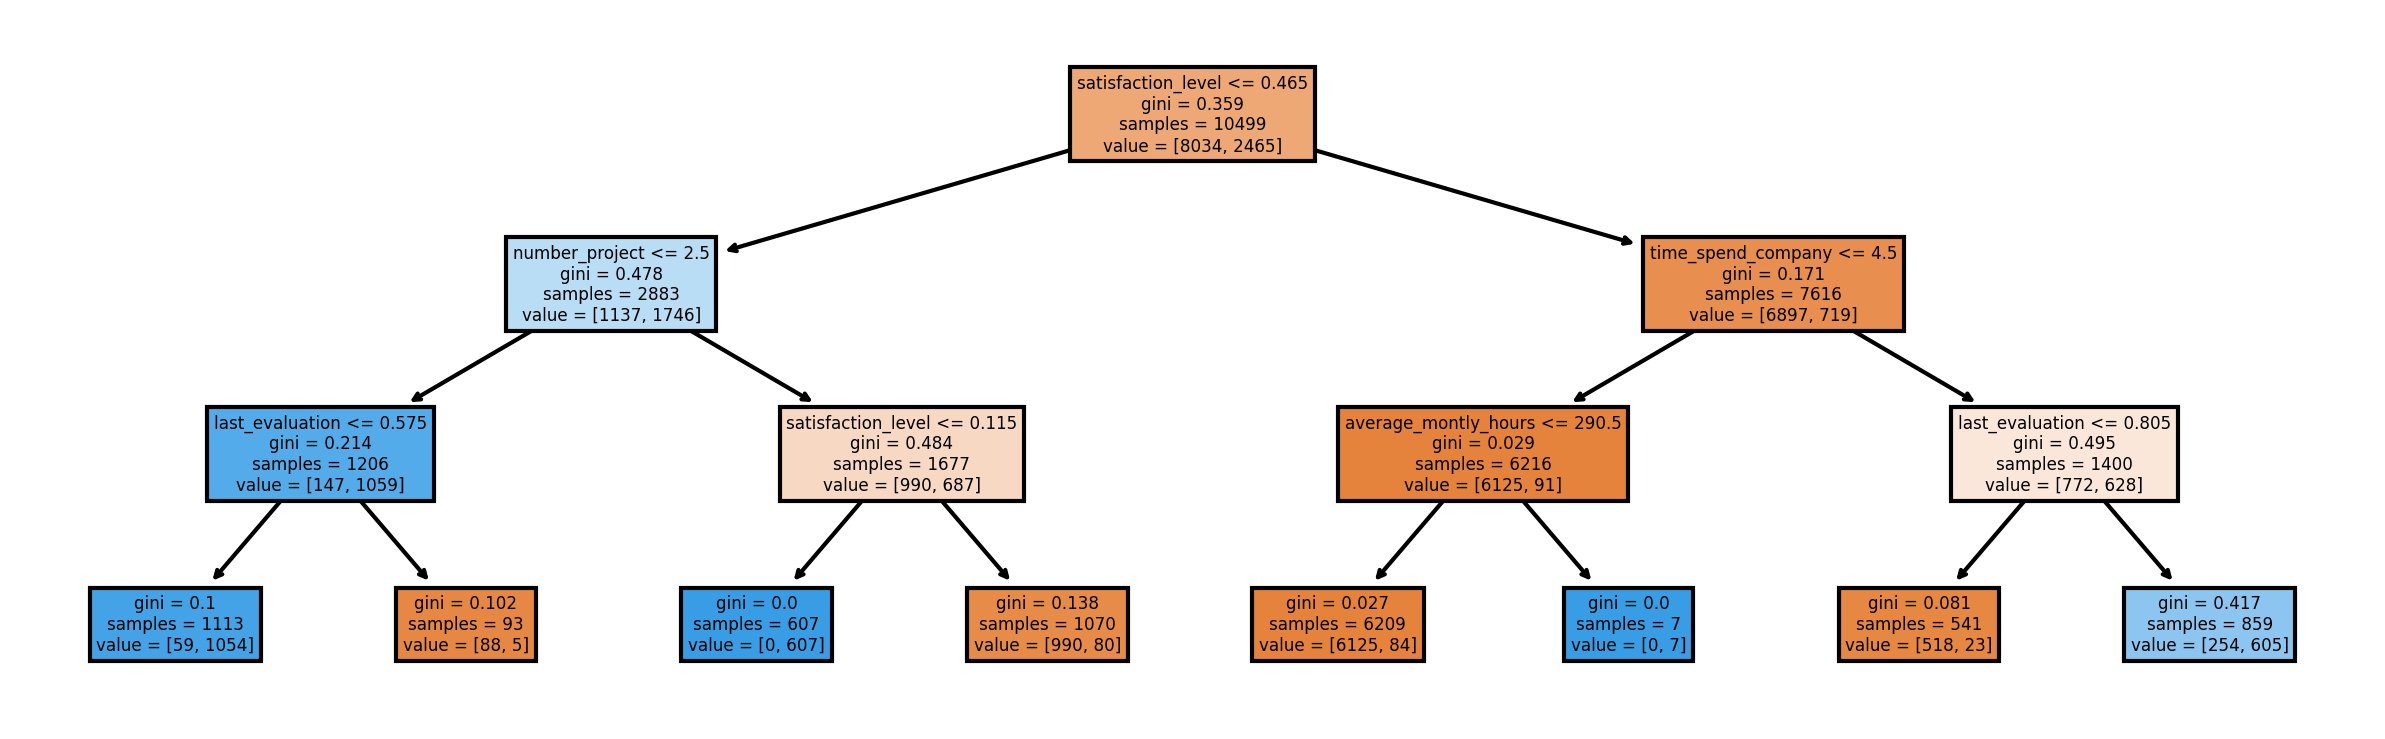

In [39]:
from sklearn import tree
fig,ax= plt.subplots(nrows=1,ncols=1,figsize =(10,3),dpi=300)
tree.plot_tree(clf,feature_names = X_train.columns, filled = True)
plt.show()

TASK 4

In [40]:
from sklearn.metrics import confusion_matrix,recall_score,f1_score,precision_score

print('confusion matrix :\n',confusion_matrix(Y_test,ytest_pred))
print('\naccuracy:',accuracy_score(Y_test,ytest_pred))
print('\nrecall:',recall_score(Y_test,ytest_pred,average='weighted'))
print('\nf1-score:',f1_score(Y_test,ytest_pred,average='weighted'))
print('\nprecision:',precision_score(Y_test,ytest_pred))

confusion matrix :
 [[3269  125]
 [  81 1025]]

accuracy: 0.9542222222222222

recall: 0.9542222222222222

f1-score: 0.9545193023340598

precision: 0.8913043478260869


In [41]:
from sklearn.metrics import roc_auc_score
auc=roc_auc_score(Y_test,ytest_pred)
print("%0.3f"%auc)

0.945


TASK 5

In [42]:
df1=df.drop(['left','salary'],axis=1)
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary_num
0,0.38,0.53,2,157,3,0,0,7,4649
1,0.80,0.86,5,262,6,0,0,7,34126
2,0.11,0.88,7,272,4,0,0,7,40522
3,0.72,0.87,5,223,5,0,0,7,6916
4,0.37,0.52,2,159,3,0,0,7,10928
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,5089
14995,0.37,0.48,2,160,3,0,0,8,4001
14996,0.37,0.53,2,143,3,0,0,8,12842
14997,0.11,0.96,6,280,4,0,0,8,8849


In [47]:
season_dummies = pd.get_dummies(df1.Department, prefix="Department")
df_with_dummies = pd.concat([df1,season_dummies],axis='columns')
df_with_dummies.drop('Department',axis='columns',inplace=True)
df1=df_with_dummies
df1_train,df1_test=train_test_split(df1,test_size=0.3,random_state=2)
X1_train=df1_train.drop(columns='salary_num',axis=1)
Y1_train=df1_train['salary_num']
X1_test=df1_test.drop(columns='salary_num',axis=1)
Y1_test=df1_test['salary_num']

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtm = DecisionTreeRegressor(max_depth=3,min_samples_split=5,max_leaf_nodes=10)
dtm.fit(X1_train,Y1_train)
dtm.score(X1_test,Y1_test)

0.05318543671294362

In [55]:
dtm.predict(X1_test)

array([31228.25685106, 24519.13179449, 31228.25685106, ...,
       31228.25685106, 24519.13179449, 31228.25685106])

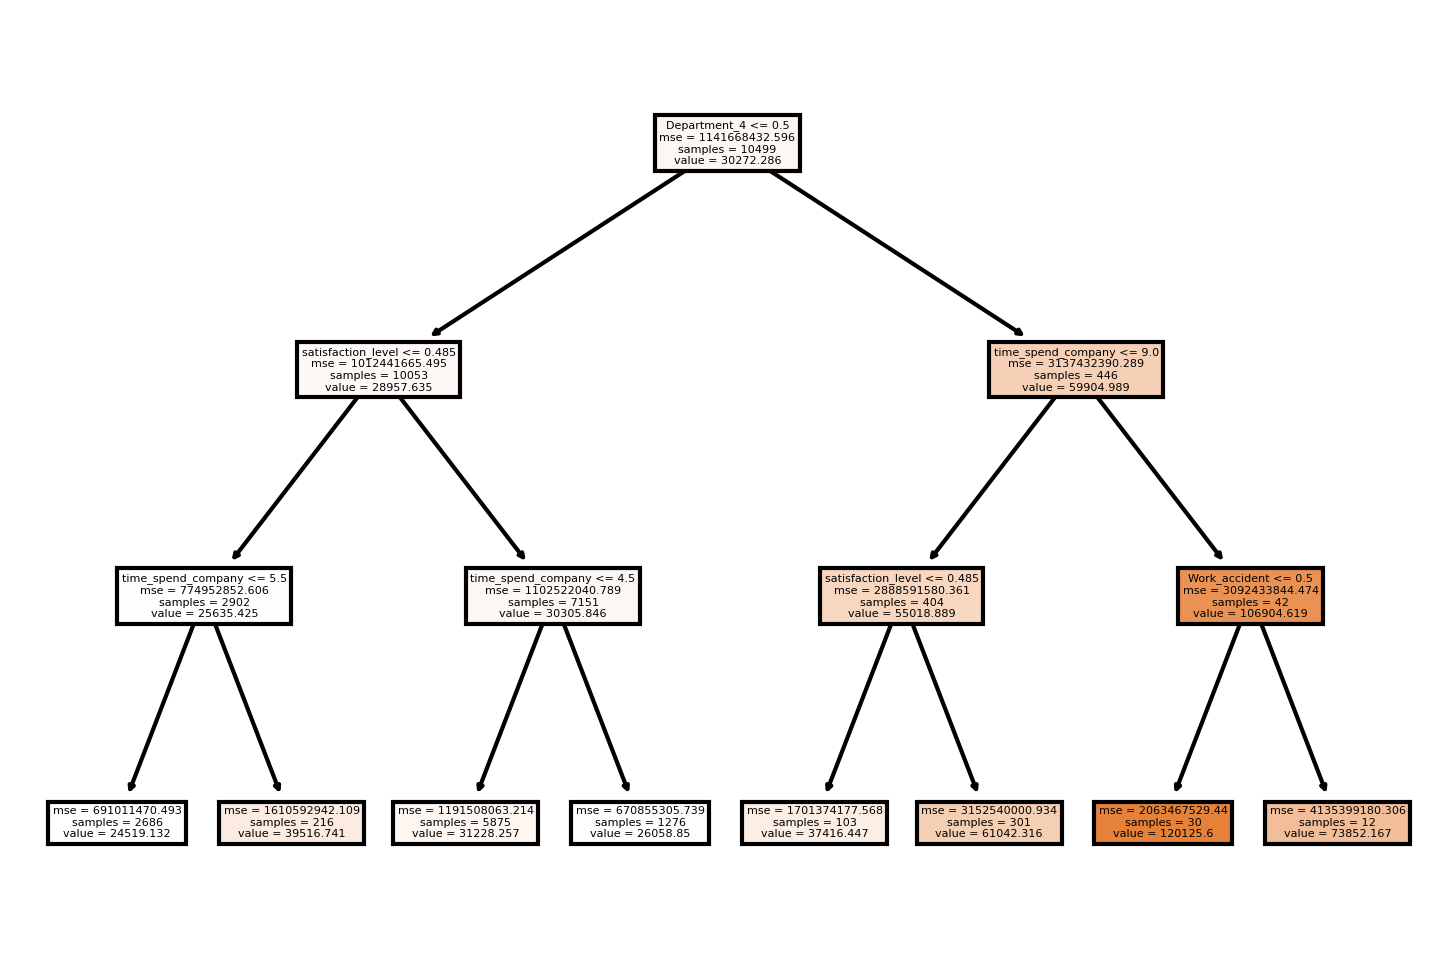

In [56]:
fig,ax= plt.subplots(dpi=300)
tree.plot_tree(dtm,feature_names = X1_train.columns, filled = True)
plt.show()